In [1]:
import cv2
import numpy as np

from moviepy.editor import VideoFileClip
from scipy.misc import imresize


from matplotlib import pyplot
from matplotlib.pyplot import imshow, figure 

import IPython.display as display
from PIL import Image

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


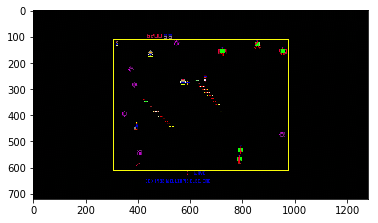

In [2]:
# Save clips to file
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/clip.flv')

frame = clip.get_frame(113)
ds = imresize(frame, size=(720, 1280), interp='nearest')
imshow(ds)

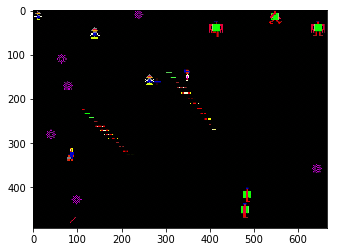

In [3]:
# Clip play area
crop = ds[115:608, 309:975]
imshow(crop)

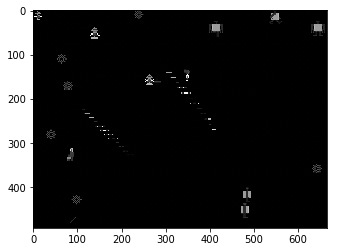

In [4]:
# Grayscale
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
imshow(gray, cmap="gray")

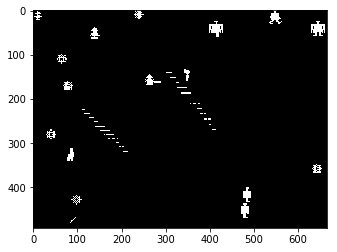

In [5]:
# Add a threshold
ret,thresh = cv2.threshold(gray,10,255,0)
imshow(thresh, cmap="gray")

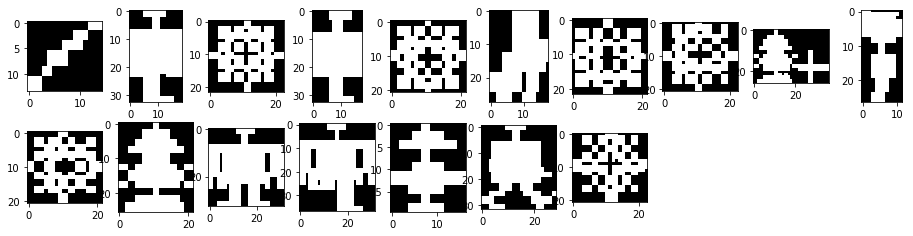

In [6]:
# Find Contours
tagged = thresh.copy()
contours, hierarchy = cv2.findContours(tagged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
fig=figure(figsize=(16, 16))
i = 0
c = 8
r = 10
enemies = []
for contour in enumerate(contours):       
    (x,y,w,h) = cv2.boundingRect(contour[1])
    if h < 10 or h > 50 or w < 10:
        continue
    i += 1
    if i > c * r:
        break
    snip = tagged[y:y+h, x:x+w]
    enemies.append(snip)
    fig.add_subplot(c, r, i)
    imshow(snip, cmap="gray")
    #cv2.imwrite("/home/strider/Code/robotron/resources/images/enemies/{}.jpg".format(i), snip)
    cv2.rectangle(tagged, (x,y), (x+w,y+h), (255, 255, 255), 2)

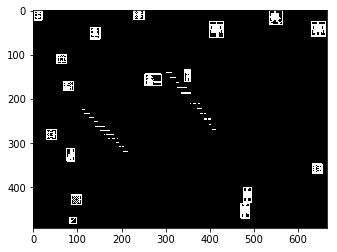

In [7]:
imshow(tagged, cmap="gray")

(37, 32)


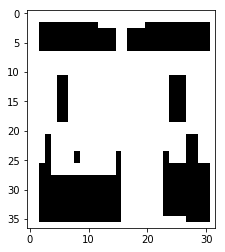

In [8]:
enemy = enemies[13]
print(enemy.shape)
imshow(enemy, cmap="gray")

CPU times: user 14.1 ms, sys: 33.7 ms, total: 47.7 ms
Wall time: 15.8 ms


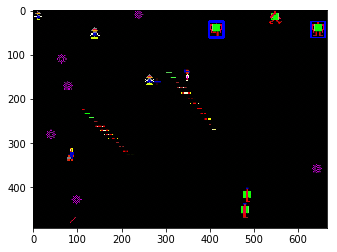

In [9]:
# Find Template
image = thresh.copy()
output = crop.copy()
w, h = enemy.shape[::-1]

%time res = cv2.matchTemplate(image,enemy,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    #print(pt)
    cv2.rectangle(output, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

imshow(output, cmap="gray")

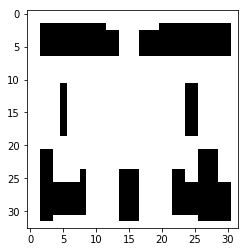

In [25]:
imshow(enemies[12], cmap="gray")
blah = enemies[12]

In [28]:
import mahotas
mahotas.features.zernike_moments(blah, 30)

array([3.18309886e-01, 3.25155104e-16, 6.15229203e-01, 6.12512849e-03,
       6.24614235e-03, 7.52667766e-03, 3.55534024e-01, 2.63370764e-02,
       2.20595181e-02, 1.95826988e-02, 2.85639952e-02, 7.20140964e-04,
       7.16992972e-03, 5.42570669e-02, 5.91206724e-02, 1.15814925e-03,
       2.36412091e-02, 4.49545722e-02, 6.29787531e-03, 1.33198677e-03,
       8.15560246e-02, 6.13904724e-02, 2.02122928e-02, 3.57984812e-03,
       5.73554240e-03])